In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11490434/11490434 [==============================] - 4s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#2): Which is digit '4'


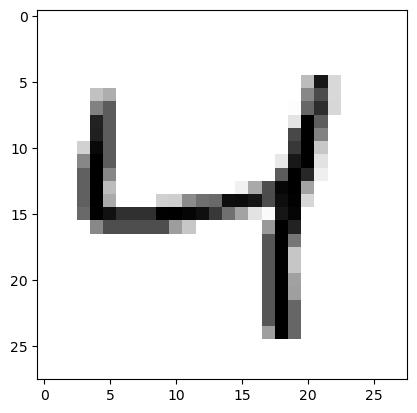

In [5]:
digit = 2 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

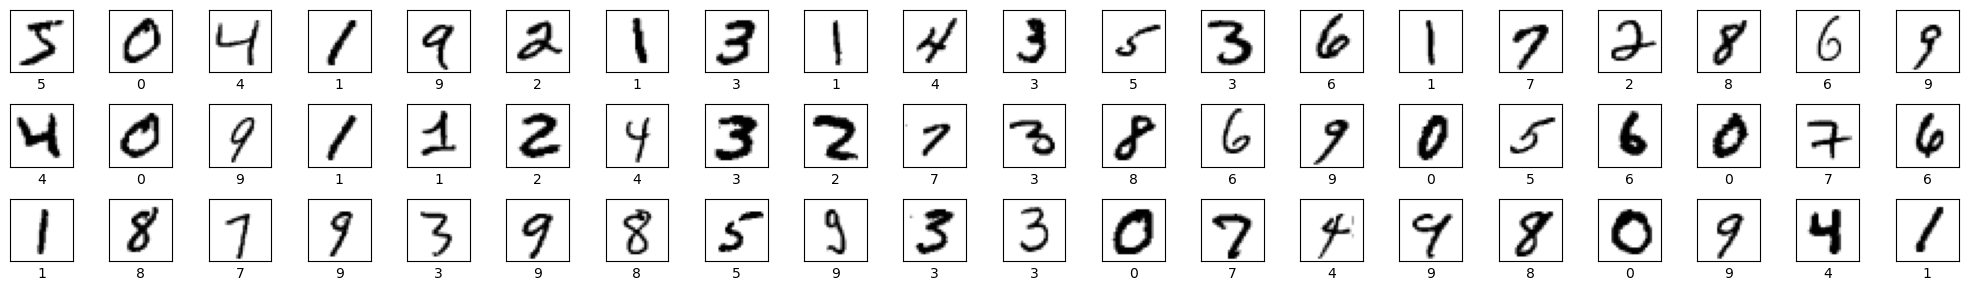

In [6]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [8]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#20): Which is digit '4'


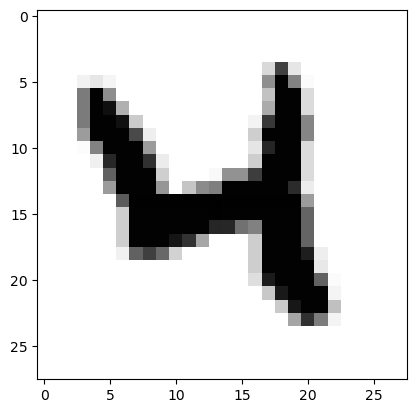

In [10]:
digit = 20 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [24]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [26]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 1s 2ms/step - loss: 0.9990 - accuracy: 0.7000 - val_loss: 0.4794 - val_accuracy: 0.8638
Epoch 2/5
657/657 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8788 - val_loss: 0.3647 - val_accuracy: 0.8931
Epoch 3/5
657/657 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.9000 - val_loss: 0.3279 - val_accuracy: 0.9052
Epoch 4/5
657/657 [==============================] - 1s 2ms/step - loss: 0.3125 - accuracy: 0.9105 - val_loss: 0.2984 - val_accuracy: 0.9121
Epoch 5/5
657/657 [==============================] - 1s 2ms/step - loss: 0.2838 - accuracy: 0.9174 - val_loss: 0.2726 - val_accuracy: 0.9212


In [27]:
k=h

In [28]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [29]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)


Epoch 1/5
657/657 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.9234 - val_loss: 0.2703 - val_accuracy: 0.9216
Epoch 2/5
657/657 [==============================] - 1s 1ms/step - loss: 0.2646 - accuracy: 0.9230 - val_loss: 0.2677 - val_accuracy: 0.9227
Epoch 3/5
657/657 [==============================] - 1s 1ms/step - loss: 0.2643 - accuracy: 0.9236 - val_loss: 0.2724 - val_accuracy: 0.9191
Epoch 4/5
657/657 [==============================] - 1s 1ms/step - loss: 0.2640 - accuracy: 0.9242 - val_loss: 0.2735 - val_accuracy: 0.9198
Epoch 5/5
657/657 [==============================] - 1s 1ms/step - loss: 0.2631 - accuracy: 0.9239 - val_loss: 0.2730 - val_accuracy: 0.9198


In [30]:
k1=h

In [31]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [32]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 2s 2ms/step - loss: 0.2612 - accuracy: 0.9232 - val_loss: 0.2669 - val_accuracy: 0.9205
Epoch 2/5
657/657 [==============================] - 1s 2ms/step - loss: 0.2407 - accuracy: 0.9292 - val_loss: 0.2473 - val_accuracy: 0.9270
Epoch 3/5
657/657 [==============================] - 1s 2ms/step - loss: 0.2224 - accuracy: 0.9344 - val_loss: 0.2241 - val_accuracy: 0.9366
Epoch 4/5
657/657 [==============================] - 1s 2ms/step - loss: 0.2054 - accuracy: 0.9403 - val_loss: 0.2189 - val_accuracy: 0.9392
Epoch 5/5
657/657 [==============================] - 1s 2ms/step - loss: 0.1894 - accuracy: 0.9445 - val_loss: 0.2093 - val_accuracy: 0.9392


In [23]:
k2=h

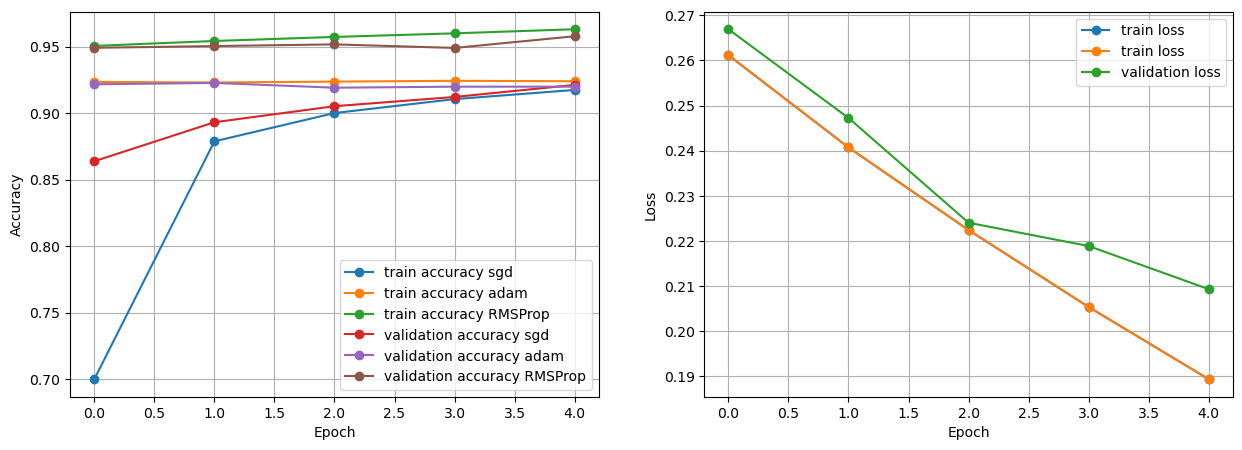

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k.history['accuracy'], 'o-', label='train accuracy sgd')
plt.plot(k1.history['accuracy'], 'o-', label='train accuracy adam')
plt.plot(k2.history['accuracy'], 'o-', label='train accuracy RMSProp')
plt.plot(k.history['val_accuracy'], 'o-', label = 'validation accuracy sgd')
plt.plot(k1.history['val_accuracy'], 'o-', label = 'validation accuracy adam')
plt.plot(k2.history['val_accuracy'], 'o-', label = 'validation accuracy RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()